# TRATAMENTOS DOS DADOS<br>

> ## Micro dados inep: dataset Escolas.csv

In [71]:
#diretorio_datasets = "/home/matteus-paula/Downloads/dados_tcc/inep"
diretorio_datasets = "/home/caioabreu/workspace/tcc/datasets/educacao-basica/inep"

Inclusão da biblioteca Pandas do Python para exploratoria e analise dos dados

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
dados_escolas = pd.read_csv(f'{diretorio_datasets}/ESCOLAS.CSV', 
                            delimiter="|", 
                            encoding = "ISO-8859-1",
                            usecols=['CO_ENTIDADE', 'TP_DEPENDENCIA', 
                                     'TP_SITUACAO_FUNCIONAMENTO','IN_REGULAR',
                                     'IN_EJA', 'IN_PROFISSIONALIZANTE', 'CO_UF', 
                                     'CO_MUNICIPIO', 
                                     'IN_COMUM_PRE', 'IN_COMUM_FUND_AI', 
                                     'IN_COMUM_FUND_AF', 'IN_COMUM_MEDIO_NORMAL', 
                                     'IN_COMUM_MEDIO_MEDIO', 'IN_COMUM_MEDIO_INTEGRADO', 
                                     'IN_AGUA_INEXISTENTE', 'IN_AGUA_FILTRADA', 
                                     'IN_ESGOTO_INEXISTENTE','IN_BIBLIOTECA_SALA_LEITURA',
                                     'IN_BANHEIRO_FORA_PREDIO', 'IN_BANHEIRO_DENTRO_PREDIO', 
                                     'IN_REFEITORIO', 'IN_AUDITORIO', 'IN_COMPUTADOR', 
                                     'IN_INTERNET', 'IN_BANDA_LARGA', 'IN_ALIMENTACAO', 
                                     'IN_PATIO_COBERTO', 'IN_PATIO_DESCOBERTO', 
                                     'IN_AREA_VERDE', 'IN_LABORATORIO_CIENCIAS', 
                                     'IN_LABORATORIO_INFORMATICA', 'IN_ENERGIA_INEXISTENTE', 
                                     'IN_LIXO_RECICLA', 'IN_QUADRA_ESPORTES', 'IN_EQUIP_TV', 
                                     'IN_EQUIP_DVD', 'IN_EQUIP_PARABOLICA', 'IN_EQUIP_COPIADORA', 
                                     'IN_EQUIP_IMPRESSORA', 'IN_EQUIP_MULTIMIDIA',
                                     'IN_DEPENDENCIAS_PNE', 'TP_ATIVIDADE_COMPLEMENTAR'])

In [74]:
dados_escolas.head()

,CO_ENTIDADE,TP_SITUACAO_FUNCIONAMENTO,CO_UF,CO_MUNICIPIO,TP_DEPENDENCIA,IN_AGUA_FILTRADA,IN_AGUA_INEXISTENTE,IN_ENERGIA_INEXISTENTE,IN_ESGOTO_INEXISTENTE,IN_LIXO_RECICLA,...,TP_ATIVIDADE_COMPLEMENTAR,IN_REGULAR,IN_EJA,IN_PROFISSIONALIZANTE,IN_COMUM_PRE,IN_COMUM_FUND_AI,IN_COMUM_FUND_AF,IN_COMUM_MEDIO_MEDIO,IN_COMUM_MEDIO_INTEGRADO,IN_COMUM_MEDIO_NORMAL
0,50032062,1,50,5001243,3,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,11016094,1,11,1100122,2,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2,21079196,1,21,2100477,3,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,51062879,1,51,5103007,3,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,31051659,1,31,3158201,3,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


## Filtrando as escolas, de acordo com os filtros informados pela documentação: 
- O filtro TP_SITUACAO_FUNCIONAMENTO=1 diz respeito à escola que está Em atividade
- O filtro (IN_REGULAR=1 OR IN_EJA=1 OR IN_PROFISSIONALIZANTE=1) diz respeito às escolas com pelo menos uma matrícula em turma de Escolarização.

In [75]:
escolas = dados_escolas.loc[(dados_escolas['TP_SITUACAO_FUNCIONAMENTO'] == 1) 
                      & (
                          (dados_escolas['IN_REGULAR'] == 1)
                            |(dados_escolas['IN_EJA'] == 1
                             |(dados_escolas['IN_PROFISSIONALIZANTE'] == 1))
                      )]

## Filtrando somente as escolas do ensino Publico

In [76]:
escolas = escolas.loc[(escolas['TP_DEPENDENCIA'] >= 1) & (escolas['TP_DEPENDENCIA'] <= 3)]
escolas.head()

,CO_ENTIDADE,TP_SITUACAO_FUNCIONAMENTO,CO_UF,CO_MUNICIPIO,TP_DEPENDENCIA,IN_AGUA_FILTRADA,IN_AGUA_INEXISTENTE,IN_ENERGIA_INEXISTENTE,IN_ESGOTO_INEXISTENTE,IN_LIXO_RECICLA,...,TP_ATIVIDADE_COMPLEMENTAR,IN_REGULAR,IN_EJA,IN_PROFISSIONALIZANTE,IN_COMUM_PRE,IN_COMUM_FUND_AI,IN_COMUM_FUND_AF,IN_COMUM_MEDIO_MEDIO,IN_COMUM_MEDIO_INTEGRADO,IN_COMUM_MEDIO_NORMAL
0,50032062,1,50,5001243,3,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,11016094,1,11,1100122,2,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2,21079196,1,21,2100477,3,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,51062879,1,51,5103007,3,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,31051659,1,31,3158201,3,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


- ### Remoção das variáveis que não serão utilizadas no estudo

In [77]:
df_all = escolas.drop(['TP_SITUACAO_FUNCIONAMENTO','IN_REGULAR',
                       'IN_EJA', 'IN_PROFISSIONALIZANTE'], axis=1)
df_all.head()

,CO_ENTIDADE,CO_UF,CO_MUNICIPIO,TP_DEPENDENCIA,IN_AGUA_FILTRADA,IN_AGUA_INEXISTENTE,IN_ENERGIA_INEXISTENTE,IN_ESGOTO_INEXISTENTE,IN_LIXO_RECICLA,IN_LABORATORIO_INFORMATICA,...,IN_INTERNET,IN_BANDA_LARGA,IN_ALIMENTACAO,TP_ATIVIDADE_COMPLEMENTAR,IN_COMUM_PRE,IN_COMUM_FUND_AI,IN_COMUM_FUND_AF,IN_COMUM_MEDIO_MEDIO,IN_COMUM_MEDIO_INTEGRADO,IN_COMUM_MEDIO_NORMAL
0,50032062,50,5001243,3,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,11016094,11,1100122,2,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2,21079196,21,2100477,3,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,51062879,51,5103007,3,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,31051659,31,3158201,3,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


- ### Obtendo os dados de matrícula

In [78]:
"""
df_matricula_CO = pd.read_csv('{}/MATRICULA_CO.CSV'.format(diretorio_datasets),
                                          delimiter="|", 
                                          encoding = "ISO-8859-1",
                                          usecols=['CO_ENTIDADE',
                                                   'TP_ETAPA_ENSINO'])
df_matricula_CO = df_matricula_CO['CO_ENTIDADE'].loc[(
    df_matricula_CO['TP_ETAPA_ENSINO'].isin([25,26,27,28,29,30,31,32,33,34,35,36,37,38]))].drop_duplicates()
df_matricula_CO.count()
"""

'\ndf_matricula_CO = pd.read_csv(\'{}/MATRICULA_CO.CSV\'.format(diretorio_datasets),\n                                          delimiter="|", \n                                          encoding = "ISO-8859-1",\n                                          usecols=[\'CO_ENTIDADE\',\n                                                   \'TP_ETAPA_ENSINO\'])\ndf_matricula_CO = df_matricula_CO[\'CO_ENTIDADE\'].loc[(\n    df_matricula_CO[\'TP_ETAPA_ENSINO\'].isin([25,26,27,28,29,30,31,32,33,34,35,36,37,38]))].drop_duplicates()\ndf_matricula_CO.count()\n'

In [79]:
"""
df_matricula_NORDESTE = pd.read_csv('{}/MATRICULA_NORDESTE.CSV'.format(diretorio_datasets),
                                          delimiter="|", 
                                          encoding = "ISO-8859-1",
                                          usecols=['CO_ENTIDADE',
                                                   'TP_ETAPA_ENSINO'])
df_matricula_NORDESTE = df_matricula_NORDESTE['CO_ENTIDADE'].loc[(df_matricula_NORDESTE['TP_ETAPA_ENSINO'].isin([25,26,27,28,29,30,31,32,33,34,35,36,37,38]))].drop_duplicates()
df_matricula_NORDESTE.count()
"""

'\ndf_matricula_NORDESTE = pd.read_csv(\'{}/MATRICULA_NORDESTE.CSV\'.format(diretorio_datasets),\n                                          delimiter="|", \n                                          encoding = "ISO-8859-1",\n                                          usecols=[\'CO_ENTIDADE\',\n                                                   \'TP_ETAPA_ENSINO\'])\ndf_matricula_NORDESTE = df_matricula_NORDESTE[\'CO_ENTIDADE\'].loc[(df_matricula_NORDESTE[\'TP_ETAPA_ENSINO\'].isin([25,26,27,28,29,30,31,32,33,34,35,36,37,38]))].drop_duplicates()\ndf_matricula_NORDESTE.count()\n'

In [80]:
"""
df_matricula_NORTE = pd.read_csv('{}/MATRICULA_NORTE.CSV'.format(diretorio_datasets),
                                 delimiter="|", 
                                 encoding = "ISO-8859-1",
                                 usecols=['CO_ENTIDADE',
                                          'TP_ETAPA_ENSINO'])
df_matricula_NORTE = df_matricula_NORTE['CO_ENTIDADE'].loc[(df_matricula_NORTE['TP_ETAPA_ENSINO'].isin([25,26,27,28,29,30,31,32,33,34,35,36,37,38]))].drop_duplicates()
df_matricula_NORTE.count()
"""

'\ndf_matricula_NORTE = pd.read_csv(\'{}/MATRICULA_NORTE.CSV\'.format(diretorio_datasets),\n                                 delimiter="|", \n                                 encoding = "ISO-8859-1",\n                                 usecols=[\'CO_ENTIDADE\',\n                                          \'TP_ETAPA_ENSINO\'])\ndf_matricula_NORTE = df_matricula_NORTE[\'CO_ENTIDADE\'].loc[(df_matricula_NORTE[\'TP_ETAPA_ENSINO\'].isin([25,26,27,28,29,30,31,32,33,34,35,36,37,38]))].drop_duplicates()\ndf_matricula_NORTE.count()\n'

In [81]:
"""
df_matricula_SUDESTE = pd.read_csv('{}/MATRICULA_SUDESTE.CSV'.format(diretorio_datasets),
                                   delimiter="|", 
                                   encoding = "ISO-8859-1",
                                   usecols=['CO_ENTIDADE',
                                            'TP_ETAPA_ENSINO'])
df_matricula_SUDESTE = df_matricula_SUDESTE['CO_ENTIDADE'].loc[(df_matricula_SUDESTE['TP_ETAPA_ENSINO'].isin([25,26,27,28,29,30,31,32,33,34,35,36,37,38]))].drop_duplicates()
df_matricula_SUDESTE.count()
"""

'\ndf_matricula_SUDESTE = pd.read_csv(\'{}/MATRICULA_SUDESTE.CSV\'.format(diretorio_datasets),\n                                   delimiter="|", \n                                   encoding = "ISO-8859-1",\n                                   usecols=[\'CO_ENTIDADE\',\n                                            \'TP_ETAPA_ENSINO\'])\ndf_matricula_SUDESTE = df_matricula_SUDESTE[\'CO_ENTIDADE\'].loc[(df_matricula_SUDESTE[\'TP_ETAPA_ENSINO\'].isin([25,26,27,28,29,30,31,32,33,34,35,36,37,38]))].drop_duplicates()\ndf_matricula_SUDESTE.count()\n'

In [82]:
"""
df_matricula_SUL = pd.read_csv('{}/MATRICULA_SUL.CSV'.format(diretorio_datasets),
                               delimiter="|", 
                               encoding = "ISO-8859-1",
                               usecols=['CO_ENTIDADE',
                                        'TP_ETAPA_ENSINO'])
df_matricula_SUL = df_matricula_SUL['CO_ENTIDADE'].loc[(df_matricula_SUL['TP_ETAPA_ENSINO'].isin([25,26,27,28,29,30,31,32,33,34,35,36,37,38]))].drop_duplicates()
df_matricula_SUL.count()
"""

'\ndf_matricula_SUL = pd.read_csv(\'{}/MATRICULA_SUL.CSV\'.format(diretorio_datasets),\n                               delimiter="|", \n                               encoding = "ISO-8859-1",\n                               usecols=[\'CO_ENTIDADE\',\n                                        \'TP_ETAPA_ENSINO\'])\ndf_matricula_SUL = df_matricula_SUL[\'CO_ENTIDADE\'].loc[(df_matricula_SUL[\'TP_ETAPA_ENSINO\'].isin([25,26,27,28,29,30,31,32,33,34,35,36,37,38]))].drop_duplicates()\ndf_matricula_SUL.count()\n'

In [83]:
"""
df_matricula = pd.concat([df_matricula_CO, 
                            df_matricula_NORDESTE, 
                            df_matricula_NORTE, 
                            df_matricula_SUDESTE,
                            df_matricula_SUL])
df_matricula.count()
"""

'\ndf_matricula = pd.concat([df_matricula_CO, \n                            df_matricula_NORDESTE, \n                            df_matricula_NORTE, \n                            df_matricula_SUDESTE,\n                            df_matricula_SUL])\ndf_matricula.count()\n'

- ### Removendo as escolas que não ministrem aulas para o Ensino Médio

In [85]:
#df_all = pd.merge(left=df_all, right=df_matricula, left_on='CO_ENTIDADE', right_on='CO_ENTIDADE')
df_all = df_all.loc[(df_all['IN_COMUM_MEDIO_NORMAL'] == 1) | 
                    (df_all['IN_COMUM_MEDIO_MEDIO'] == 1) |
                    (df_all['IN_COMUM_MEDIO_INTEGRADO'] == 1)]

df_all.count()

CO_ENTIDADE                   20277
CO_UF                         20277
CO_MUNICIPIO                  20277
TP_DEPENDENCIA                20277
IN_AGUA_FILTRADA              20277
IN_AGUA_INEXISTENTE           20277
IN_ENERGIA_INEXISTENTE        20277
IN_ESGOTO_INEXISTENTE         20277
IN_LIXO_RECICLA               20277
IN_LABORATORIO_INFORMATICA    20277
IN_LABORATORIO_CIENCIAS       20277
IN_QUADRA_ESPORTES            20277
IN_BIBLIOTECA_SALA_LEITURA    20277
IN_BANHEIRO_FORA_PREDIO       20277
IN_BANHEIRO_DENTRO_PREDIO     20277
IN_DEPENDENCIAS_PNE           20277
IN_REFEITORIO                 20277
IN_AUDITORIO                  20277
IN_PATIO_COBERTO              20277
IN_PATIO_DESCOBERTO           20277
IN_AREA_VERDE                 20277
IN_EQUIP_TV                   20277
IN_EQUIP_DVD                  20277
IN_EQUIP_PARABOLICA           20277
IN_EQUIP_COPIADORA            20277
IN_EQUIP_IMPRESSORA           20277
IN_EQUIP_MULTIMIDIA           20277
IN_COMPUTADOR               

- ### Verificando a variação e a distribuição dos dados

In [86]:
df_all.describe()

,CO_ENTIDADE,CO_UF,CO_MUNICIPIO,TP_DEPENDENCIA,IN_AGUA_FILTRADA,IN_AGUA_INEXISTENTE,IN_ENERGIA_INEXISTENTE,IN_ESGOTO_INEXISTENTE,IN_LIXO_RECICLA,IN_LABORATORIO_INFORMATICA,...,IN_INTERNET,IN_BANDA_LARGA,IN_ALIMENTACAO,TP_ATIVIDADE_COMPLEMENTAR,IN_COMUM_PRE,IN_COMUM_FUND_AI,IN_COMUM_FUND_AF,IN_COMUM_MEDIO_MEDIO,IN_COMUM_MEDIO_INTEGRADO,IN_COMUM_MEDIO_NORMAL
count,2.027700e+04,20277.000000,2.027700e+04,20277.000000,20277.000000,20277.000000,20277.000000,20277.000000,20277.000000,20277.000000,...,20277.000000,20277.000000,20277.000000,20277.000000,20277.000000,20277.000000,20277.000000,20277.000000,20277.000000,20277.000000
mean,3.239268e+07,32.253637,3.241851e+06,1.984860,0.857869,0.005622,0.003502,0.012773,0.072545,0.839671,...,0.909454,0.771169,0.985254,0.372639,0.013661,0.216501,0.676136,0.945307,0.085269,0.054594
std,9.732352e+06,9.733286,9.757603e+05,0.197433,0.349194,0.074772,0.059071,0.112297,0.259395,0.366920,...,0.286969,0.420090,0.120537,0.483519,0.116081,0.411870,0.467961,0.227385,0.279288,0.227191
min,1.100026e+07,11.000000,1.100015e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.607592e+07,26.000000,2.607752e+06,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,3.303291e+07,33.000000,3.301702e+06,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,4.100287e+07,41.000000,4.101101e+06,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,5.306818e+07,53.000000,5.300108e+06,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- ### Verificando os dados omissos

In [87]:
df_all.isnull().any()

CO_ENTIDADE                   False
CO_UF                         False
CO_MUNICIPIO                  False
TP_DEPENDENCIA                False
IN_AGUA_FILTRADA              False
IN_AGUA_INEXISTENTE           False
IN_ENERGIA_INEXISTENTE        False
IN_ESGOTO_INEXISTENTE         False
IN_LIXO_RECICLA               False
IN_LABORATORIO_INFORMATICA    False
IN_LABORATORIO_CIENCIAS       False
IN_QUADRA_ESPORTES            False
IN_BIBLIOTECA_SALA_LEITURA    False
IN_BANHEIRO_FORA_PREDIO       False
IN_BANHEIRO_DENTRO_PREDIO     False
IN_DEPENDENCIAS_PNE           False
IN_REFEITORIO                 False
IN_AUDITORIO                  False
IN_PATIO_COBERTO              False
IN_PATIO_DESCOBERTO           False
IN_AREA_VERDE                 False
IN_EQUIP_TV                   False
IN_EQUIP_DVD                  False
IN_EQUIP_PARABOLICA           False
IN_EQUIP_COPIADORA            False
IN_EQUIP_IMPRESSORA           False
IN_EQUIP_MULTIMIDIA           False
IN_COMPUTADOR               

- ### Verificando dados duplicados

In [88]:
print(df_all['CO_ENTIDADE'].count())
print(df_all['CO_ENTIDADE'].drop_duplicates().count())

20277
20277


In [89]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20277 entries, 1 to 246572
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CO_ENTIDADE                 20277 non-null  int64  
 1   CO_UF                       20277 non-null  int64  
 2   CO_MUNICIPIO                20277 non-null  int64  
 3   TP_DEPENDENCIA              20277 non-null  int64  
 4   IN_AGUA_FILTRADA            20277 non-null  float64
 5   IN_AGUA_INEXISTENTE         20277 non-null  float64
 6   IN_ENERGIA_INEXISTENTE      20277 non-null  float64
 7   IN_ESGOTO_INEXISTENTE       20277 non-null  float64
 8   IN_LIXO_RECICLA             20277 non-null  float64
 9   IN_LABORATORIO_INFORMATICA  20277 non-null  float64
 10  IN_LABORATORIO_CIENCIAS     20277 non-null  float64
 11  IN_QUADRA_ESPORTES          20277 non-null  float64
 12  IN_BIBLIOTECA_SALA_LEITURA  20277 non-null  float64
 13  IN_BANHEIRO_FORA_PREDIO     20

<br>

<br>

# ANALISES<br>

In [90]:
escolas_federais = df_all.loc[(df_all['TP_DEPENDENCIA'] == 1)]
print('ESCOLAS DE NIVEL FEDERAL: {}'.format(escolas_federais['CO_ENTIDADE'].count()))

escolas_estaduais = df_all.loc[(df_all['TP_DEPENDENCIA'] == 2)]
print('ESCOLAS DE NIVEL ESTADUAL: {}'.format(escolas_estaduais['CO_ENTIDADE'].count()))

escolas_municipais = df_all.loc[(df_all['TP_DEPENDENCIA'] == 3)]
print('ESCOLAS DE NIVEL MUNICIPAL: {}'.format(escolas_municipais['CO_ENTIDADE'].count()))

ESCOLAS DE NIVEL FEDERAL: 551
ESCOLAS DE NIVEL ESTADUAL: 19482
ESCOLAS DE NIVEL MUNICIPAL: 244


In [91]:
df_all.loc[df_all['IN_AGUA_INEXISTENTE'] == 1, 'IN_AGUA_EXISTENTE'] = 0
df_all.loc[df_all['IN_AGUA_INEXISTENTE'] == 0, 'IN_AGUA_EXISTENTE'] = 1

df_all['IN_AGUA_EXISTENTE'].count()

20277

In [92]:
df_all.loc[df_all['IN_ENERGIA_INEXISTENTE'] == 1, 'IN_ENERGIA_EXISTENTE'] = 0
df_all.loc[df_all['IN_ENERGIA_INEXISTENTE'] == 0, 'IN_ENERGIA_EXISTENTE'] = 1

df_all['IN_ENERGIA_EXISTENTE'].count()

20277

In [93]:
df_all.loc[df_all['IN_ESGOTO_INEXISTENTE'] == 1, 'IN_ESGOTO_EXISTENTE'] = 0
df_all.loc[df_all['IN_ESGOTO_INEXISTENTE'] == 0, 'IN_ESGOTO_EXISTENTE'] = 1

df_all['IN_ESGOTO_EXISTENTE'].count()

20277

In [94]:
# Transformando as variaveis de ensino fundamental em uma unica variavel
#df_all.loc[(df_all['IN_COMUM_FUND_AI'] == 1) | (df_all['IN_COMUM_FUND_AF'] == 1), 'IN_COMUM_FUND'] = 1
#df_all.loc[(df_all['IN_COMUM_FUND_AI'] == 0) & (df_all['IN_COMUM_FUND_AF'] == 0), 'IN_COMUM_FUND'] = 0

# Transformando as variaveis de ensino medio em uma unica variavel
#df_all.loc[(df_all['IN_COMUM_MEDIO_NORMAL'] == 1) 
#           | (df_all['IN_COMUM_MEDIO_MEDIO'] == 1)
#           | (df_all['IN_COMUM_MEDIO_INTEGRADO'] == 1), 'IN_COMUM_MEDIO'] = 1

#df_all.loc[df_all['IN_COMUM_MEDIO'] == 1].count()



In [95]:
# Transformando as variaveis de BANHEIRO em uma unica variavel
df_all.loc[(df_all['IN_BANHEIRO_FORA_PREDIO'] == 1) | (df_all['IN_BANHEIRO_DENTRO_PREDIO'] == 1), 'IN_BANHEIRO'] = 1
df_all.loc[(df_all['IN_BANHEIRO_FORA_PREDIO'] == 0) & (df_all['IN_BANHEIRO_DENTRO_PREDIO'] == 0), 'IN_BANHEIRO'] = 0

In [96]:
# Transformando as variaveis de PATIO em uma unica variavel

df_all.loc[(df_all['IN_PATIO_COBERTO'] == 1) | (df_all['IN_PATIO_DESCOBERTO'] == 1), 'IN_PATIO'] = 1
df_all.loc[(df_all['IN_PATIO_COBERTO'] == 0) & (df_all['IN_PATIO_DESCOBERTO'] == 0), 'IN_PATIO'] = 0

In [97]:
df_final = df_all[
                ['CO_MUNICIPIO','CO_UF',
                 'IN_AGUA_EXISTENTE', 'IN_AGUA_FILTRADA', 
                 'IN_ESGOTO_EXISTENTE','IN_BIBLIOTECA_SALA_LEITURA',
                 'IN_BANHEIRO', 'IN_REFEITORIO', 'IN_AUDITORIO',
                 'IN_COMPUTADOR', 'IN_INTERNET',
                 'IN_BANDA_LARGA', 'IN_ALIMENTACAO',
                 'IN_PATIO','IN_AREA_VERDE', 'IN_LABORATORIO_CIENCIAS', 
                 'IN_LABORATORIO_INFORMATICA', 'IN_ENERGIA_EXISTENTE', 
                 'IN_LIXO_RECICLA', 'IN_QUADRA_ESPORTES',
                 'IN_DEPENDENCIAS_PNE', 'TP_ATIVIDADE_COMPLEMENTAR']
                ].groupby(['CO_MUNICIPIO', 'CO_UF'], as_index=False) \
            .agg(lambda x: round((x.sum() * 100) / x.count(), 2))
df_final.head()

/home/caioabreu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


,CO_MUNICIPIO,CO_UF,IN_AGUA_EXISTENTE,IN_AGUA_FILTRADA,IN_ESGOTO_EXISTENTE,IN_BIBLIOTECA_SALA_LEITURA,IN_BANHEIRO,IN_REFEITORIO,IN_AUDITORIO,IN_COMPUTADOR,...,IN_ALIMENTACAO,IN_PATIO,IN_AREA_VERDE,IN_LABORATORIO_CIENCIAS,IN_LABORATORIO_INFORMATICA,IN_ENERGIA_EXISTENTE,IN_LIXO_RECICLA,IN_QUADRA_ESPORTES,IN_DEPENDENCIAS_PNE,TP_ATIVIDADE_COMPLEMENTAR
0,1100015,11,100.0,100.0,100.0,50.00,100.0,50.00,0.00,50.0,...,100.0,50.0,0.0,50.0,50.0,100.0,0.00,50.0,25.00,0.00
1,1100023,11,100.0,100.0,100.0,100.00,100.0,100.00,62.50,100.0,...,100.0,100.0,75.0,75.0,87.5,100.0,0.00,87.5,75.00,25.00
2,1100031,11,100.0,100.0,100.0,50.00,100.0,100.00,0.00,100.0,...,100.0,100.0,0.0,0.0,50.0,100.0,50.00,100.0,50.00,50.00
3,1100049,11,100.0,100.0,100.0,58.33,100.0,33.33,16.67,100.0,...,100.0,75.0,50.0,50.0,50.0,100.0,8.33,50.0,41.67,8.33
4,1100056,11,100.0,100.0,100.0,100.00,100.0,0.00,100.00,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.00,100.0,0.00,0.00


In [98]:
df_final.count()

CO_MUNICIPIO                  5561
CO_UF                         5561
IN_AGUA_EXISTENTE             5561
IN_AGUA_FILTRADA              5561
IN_ESGOTO_EXISTENTE           5561
IN_BIBLIOTECA_SALA_LEITURA    5561
IN_BANHEIRO                   5561
IN_REFEITORIO                 5561
IN_AUDITORIO                  5561
IN_COMPUTADOR                 5561
IN_INTERNET                   5561
IN_BANDA_LARGA                5561
IN_ALIMENTACAO                5561
IN_PATIO                      5561
IN_AREA_VERDE                 5561
IN_LABORATORIO_CIENCIAS       5561
IN_LABORATORIO_INFORMATICA    5561
IN_ENERGIA_EXISTENTE          5561
IN_LIXO_RECICLA               5561
IN_QUADRA_ESPORTES            5561
IN_DEPENDENCIAS_PNE           5561
TP_ATIVIDADE_COMPLEMENTAR     5561
dtype: int64

In [99]:
df_final.to_csv(f'{diretorio_datasets}/escolas_set.csv', sep=';', encoding='utf-8', index=False)

<br>

In [25]:
df = df_all.pivot_table(columns='TP_DEPENDENCIA', values=['IN_AGUA_FILTRADA', 
              'IN_AGUA_EXISTENTE', 'IN_ENERGIA_EXISTENTE', 
              'IN_BANHEIRO','IN_REFEITORIO', 'IN_ALIMENTACAO',
             'IN_BIBLIOTECA_SALA_LEITURA', 'IN_AUDITORIO',
             'IN_COMPUTADOR', 'IN_INTERNET', 'IN_BANDA_LARGA', 
             'IN_LABORATORIO_CIENCIAS', 'IN_LABORATORIO_INFORMATICA',
             'IN_LIXO_RECICLA', 'IN_AREA_VERDE',
             'IN_PATIO', 'IN_QUADRA_ESPORTES', 'IN_EQUIP_TV', 'IN_EQUIP_DVD', 
             'IN_EQUIP_PARABOLICA', 'IN_EQUIP_COPIADORA', 
             'IN_EQUIP_IMPRESSORA', 'IN_EQUIP_MULTIMIDIA'], aggfunc=lambda x: round((x.sum() * 100) / x.count(), 2) )
df

TP_DEPENDENCIA,1,2,3
IN_AGUA_EXISTENTE,100.00,98.87,95.14
IN_AGUA_FILTRADA,92.12,82.36,84.00
IN_ALIMENTACAO,76.71,98.65,99.80
IN_AREA_VERDE,74.83,34.05,26.23
IN_AUDITORIO,77.91,16.07,5.38
IN_BANDA_LARGA,93.49,73.21,42.57
IN_BANHEIRO,99.14,86.64,90.88
IN_BIBLIOTECA_SALA_LEITURA,97.43,79.90,35.43
IN_COMPUTADOR,99.32,91.95,70.57
IN_ENERGIA_EXISTENTE,100.00,98.32,96.04


In [26]:
df_2 = df_all.where(df_all['IN_COMUM_FUND'] == 1)

df_2 = df_2[['IN_AGUA_FILTRADA', 
              'IN_AGUA_EXISTENTE', 'IN_BIBLIOTECA_SALA_LEITURA',
             'IN_BANHEIRO', 
             'IN_REFEITORIO', 'IN_AUDITORIO',
             'IN_COMPUTADOR', 'IN_INTERNET',
             'IN_BANDA_LARGA', 'IN_ALIMENTACAO', 
             'IN_LABORATORIO_CIENCIAS', 'IN_LABORATORIO_INFORMATICA',
             'IN_ENERGIA_EXISTENTE', 'IN_LIXO_RECICLA',
             'IN_AREA_VERDE','IN_PATIO',
             'IN_QUADRA_ESPORTES', 'IN_EQUIP_TV', 'IN_EQUIP_DVD', 
             'IN_EQUIP_PARABOLICA', 'IN_EQUIP_COPIADORA', 
             'IN_EQUIP_IMPRESSORA', 'IN_EQUIP_MULTIMIDIA']] \
            .apply(lambda x: round((x.sum() * 100) / x.count(),2))
df_2

IN_AGUA_FILTRADA              81.70
IN_AGUA_EXISTENTE             94.91
IN_BIBLIOTECA_SALA_LEITURA    48.01
IN_BANHEIRO                   90.65
IN_REFEITORIO                 33.63
IN_AUDITORIO                   7.66
IN_COMPUTADOR                 73.59
IN_INTERNET                   60.07
IN_BANDA_LARGA                47.43
IN_ALIMENTACAO                99.61
IN_LABORATORIO_CIENCIAS        8.11
IN_LABORATORIO_INFORMATICA    46.48
IN_ENERGIA_EXISTENTE          95.44
IN_LIXO_RECICLA                5.22
IN_AREA_VERDE                 26.40
IN_PATIO                      63.15
IN_QUADRA_ESPORTES            37.13
IN_EQUIP_TV                   75.14
IN_EQUIP_DVD                  68.59
IN_EQUIP_PARABOLICA           24.15
IN_EQUIP_COPIADORA            38.64
IN_EQUIP_IMPRESSORA           61.68
IN_EQUIP_MULTIMIDIA           58.62
dtype: float64

In [27]:
df_4 = df_all.where(df_all['IN_COMUM_MEDIO'] == 1)

print("Total de escolas ensino medio: " + str(df_4['CO_ENTIDADE'].count()))

df_4 = df_4[['IN_AGUA_FILTRADA', 
              'IN_AGUA_EXISTENTE', 'IN_BIBLIOTECA_SALA_LEITURA',
             'IN_BANHEIRO', 
             'IN_REFEITORIO', 'IN_AUDITORIO',
             'IN_COMPUTADOR', 'IN_INTERNET',
             'IN_BANDA_LARGA', 'IN_ALIMENTACAO', 
             'IN_LABORATORIO_CIENCIAS', 'IN_LABORATORIO_INFORMATICA',
             'IN_ENERGIA_EXISTENTE', 'IN_LIXO_RECICLA', 
             'IN_AREA_VERDE', 'IN_PATIO',
             'IN_QUADRA_ESPORTES', 'IN_EQUIP_TV', 'IN_EQUIP_DVD', 
             'IN_EQUIP_PARABOLICA', 'IN_EQUIP_COPIADORA', 
             'IN_EQUIP_IMPRESSORA', 'IN_EQUIP_MULTIMIDIA']] \
            .apply(lambda x: round((x.sum() * 100) / x.count(), 2))
df_4

Total de escolas ensino medio: 20277


IN_AGUA_FILTRADA              85.79
IN_AGUA_EXISTENTE             99.44
IN_BIBLIOTECA_SALA_LEITURA    86.16
IN_BANHEIRO                   87.58
IN_REFEITORIO                 49.83
IN_AUDITORIO                  22.62
IN_COMPUTADOR                 95.08
IN_INTERNET                   90.95
IN_BANDA_LARGA                77.12
IN_ALIMENTACAO                98.53
IN_LABORATORIO_CIENCIAS       40.19
IN_LABORATORIO_INFORMATICA    83.97
IN_ENERGIA_EXISTENTE          99.65
IN_LIXO_RECICLA                7.25
IN_AREA_VERDE                 37.28
IN_PATIO                      77.33
IN_QUADRA_ESPORTES            74.31
IN_EQUIP_TV                   91.71
IN_EQUIP_DVD                  77.88
IN_EQUIP_PARABOLICA           44.69
IN_EQUIP_COPIADORA            55.11
IN_EQUIP_IMPRESSORA           80.56
IN_EQUIP_MULTIMIDIA           86.69
dtype: float64

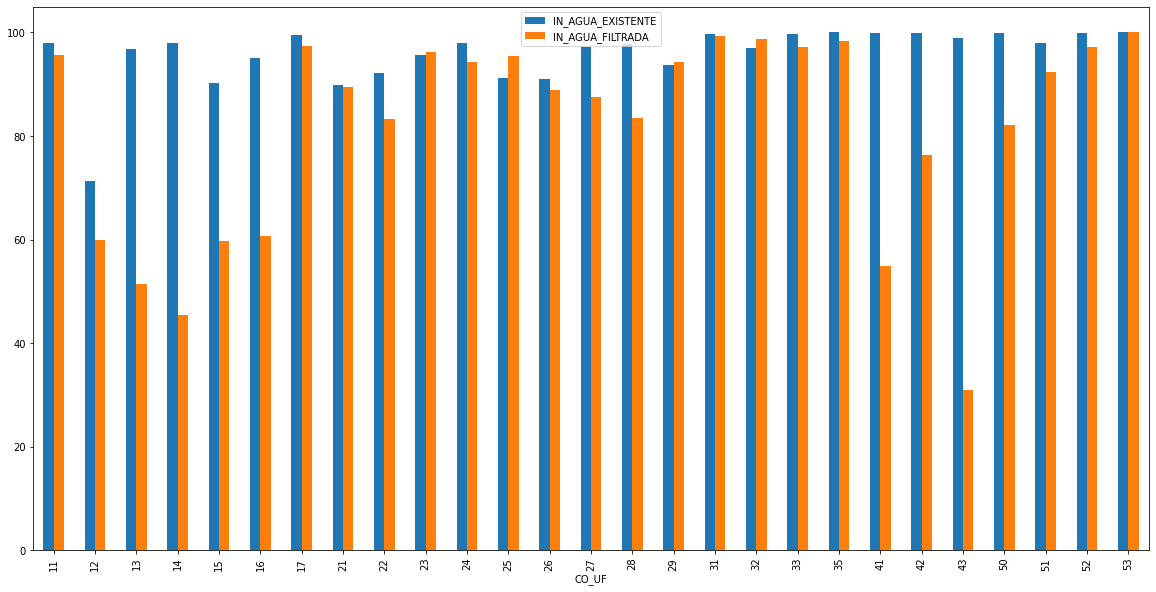

In [28]:
df_5 = df_all[['CO_UF', 'IN_AGUA_EXISTENTE', 'IN_AGUA_FILTRADA']].groupby('CO_UF') \
            .agg(lambda x: round((x.sum() * 100) / x.count(), 2))
df_5.plot(kind='bar', figsize=(20,10))

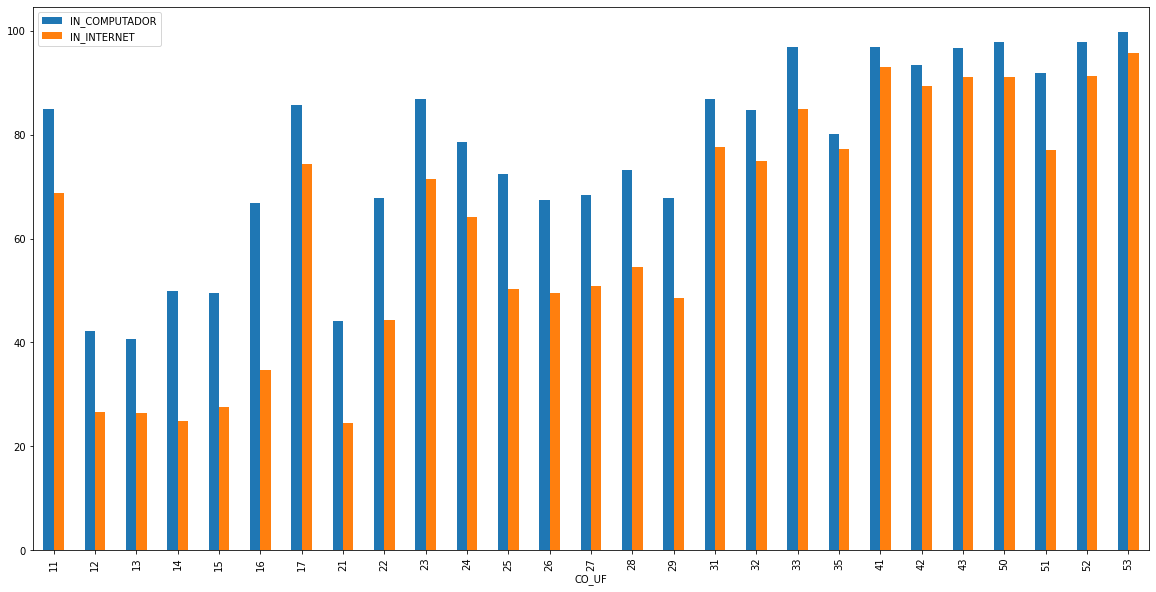

In [29]:
df_5 = df_all[['CO_UF', 'IN_COMPUTADOR', 'IN_INTERNET']].groupby('CO_UF') \
            .agg(lambda x: round((x.sum() * 100) / x.count(), 2))
df_5.plot(kind='bar', figsize=(20,10))